In [1]:
import io, os, sys, types
from IPython import get_ipython
from Utils import NotebookFinder
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
#import Test_model
from Test_model import evaluation
import Train_model 
import matplotlib.pyplot as plt
import model
from config_file import config

importing Jupyter notebook from Test_model.ipynb
importing Jupyter notebook from model.ipynb
importing Jupyter notebook from config_file.ipynb
importing Jupyter notebook from Train_model.ipynb


In [2]:
width = config["run"]["width"]
classes = config["run"]["classes"]

In [3]:
tf.__version__

'1.13.1'

In [4]:
def run_main():
    os.environ['CUDA_VISIBLE_DEVICES'] = '0,1'#Only devices that have an index in the sequence are visible to the CUDA application, and they are enumerated in the order of the sequence.
    datasets = pd.read_csv("data/data_total3.csv") 
    features = datasets.iloc[:,:-1]
    labels =  datasets.iloc[:,-1]
    skf = StratifiedKFold(n_splits=config["Train_model"]["n_splits_k"],random_state = 3)
    Test_accuracy_Epo = []
    Accuracy_value_Epo = []
    Accuracy_value_all = []
    Loss_value_all = []
    AccofB_test = []
    AccofA_test = []
    
    epoch = 0
    for train_index, test_index in skf.split(features, labels):  
        features_train = features.iloc[train_index]
        features_test =  features.iloc[test_index]
        labels_train = labels.iloc[train_index]
        labels_test =  labels.iloc[test_index]
        features_train = features_train.values
        labels_train = labels_train.values
        features_test = features_test.values
        labels_test = labels_test.values
        labels_train = labels_train.reshape(len(labels_train))
        labels_test = labels_test.reshape(len(labels_test))
        print(labels_train.shape)
        print(labels_test.shape)
        Accuracy_value,acc,Loss_value,Epoch_accracy = Train_model.train(features_train,labels_train)
        Accuracy_value_Epo.append(Epoch_accracy)
        Accuracy_value_all.extend(Accuracy_value)
        Loss_value_all.extend(Loss_value)
        print("Epoch_accracy:",Epoch_accracy)
        print("Accuracy_value_Epo",Accuracy_value_Epo)
        plt.figure(figsize=(20, 10))
        plt.plot(range(Train_model.Iteration*(epoch+1)), Accuracy_value_all)
        plt.xlabel('training step')
        plt.ylabel('accuracy value')
        plt.title('the accuracy value of training data')
       # plt.savefig('model_folder/results/accuracy.png')
        plt.show()

        plt.figure()
        plt.plot(range(Train_model.Iteration*(epoch+1)), Loss_value_all)
        plt.xlabel('training value')
        plt.ylabel('loss value')
        plt.title('the value of the loss function of the training data')
       # plt.savefig('model_folder/results/loss.png')
        plt.show()

        plt.figure()
        plt.plot(range(epoch+1),Accuracy_value_Epo)
        plt.xlabel('Epoch')
        plt.ylabel('accracy')
        plt.title('Epoch average accuracy')
       # plt.savefig('model_folder/results/Epoch_accuracy.png')
        plt.show()

        plt.figure()
        plt.plot(classes, acc)
        plt.ylabel('accuracy')
        plt.xlabel('classification')
        plt.title('Accuracy of each classification')
        #plt.savefig('model_folder/results/Accuracy_of_each_classification.png')
        plt.show()

        precision,accBA =evaluation(features_test,labels_test)
        Test_accuracy_Epo.append(precision)
        AccofB_test.append(accBA[0])
        AccofA_test.append(accBA[1])
        plt.figure()
        plt.plot(range(epoch+1),Test_accuracy_Epo)
        plt.ylabel('Test_accuracy')
        plt.xlabel('Epoch')
        plt.title('Test_accuracy')
       # plt.savefig('model_folder/results/test_accuracy.png')
        plt.show()

        y = list(range(0,epoch+1))
        plt.bar(x=range(epoch+1), height = AccofB_test, width=width, label='BENIGN',color = 'steelblue',alpha = 0.8)  
        plt.bar(x=np.arange(epoch+1)+width,height = AccofA_test, width=width, label='Attack',color = 'indianred',alpha = 0.8)  
        plt.xticks(np.arange(len(y))+width/2, y)
        plt.ylabel('Test_accuracyofclasses')
        plt.xlabel('Epoch')
        plt.title('Test_accuracyofclasses')
        plt.legend()  
       # plt.savefig('model_folder/results/test_accuracyofclasses.png')
        plt.show() 
        epoch += 1
    average_train_accracy=model.Epoch_accuracy_mean(Epoch_accracy)
    print("average_train_accracy is:",average_train_accracy)
    average_test_accracy=model.Epoch_accuracy_mean(Test_accuracy_Epo)
    print("average_test_accracy is:",average_test_accracy)

(976972,)
(139568,)
Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
index: 0  loss_value: 1.740544  accuracy_value: 0.578125
index: 1000  loss_value: 1.2092128  accuracy_value: 0.90625
index: 2000  loss_value: 1.1703527  accuracy_value: 0.96875
index: 3000  loss_value: 1.1705842  accuracy_value: 0.953125
index: 4000  loss_value: 1.081029  accuracy_value: 1.0
index: 5000  loss_value: 1.1194315  accuracy_value: 0.96875
index: 6000  loss_value: 1.0864016  accuracy_value: 0.984375
index: 7000  loss_value: 1.1377096  accuracy_value: 0.984375
index: 8000  loss_val

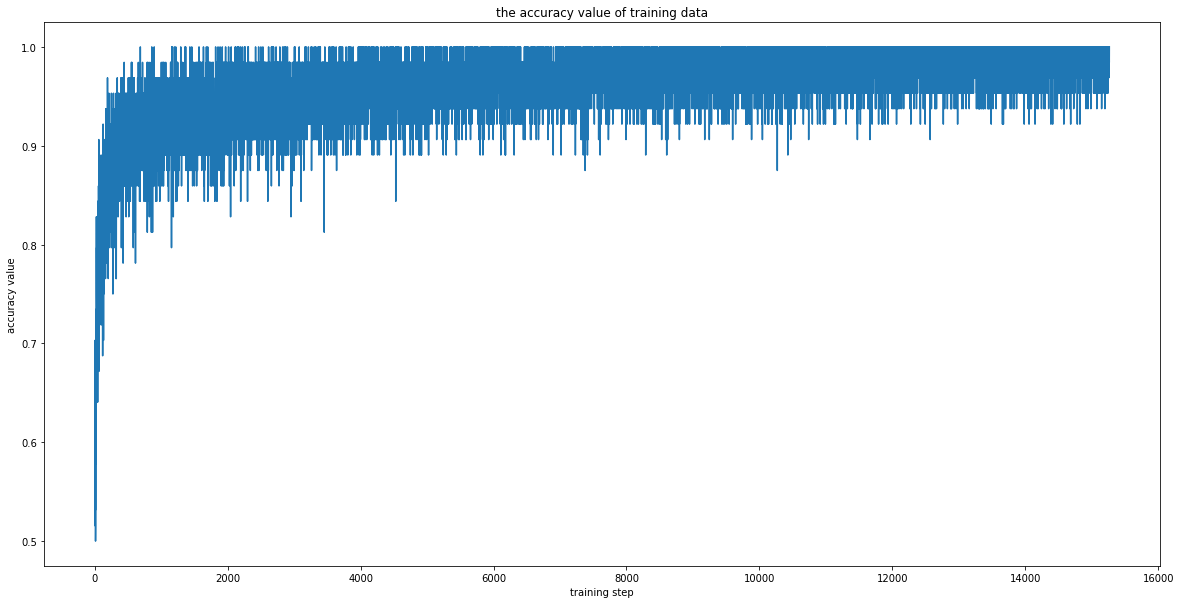

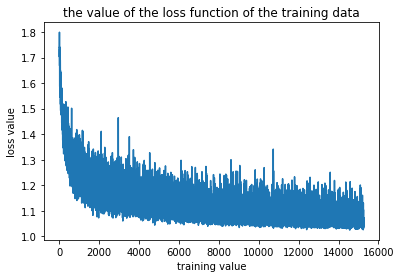

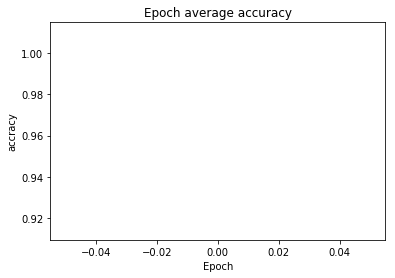

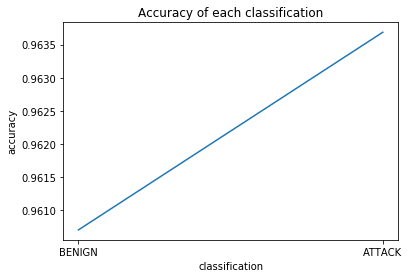

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model_folder/saver\model.ckpt
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
acc: [0.9857571428571429, 0.9710786568537259]
true_count 136559
139584
测试precision= 0.9783284617148097


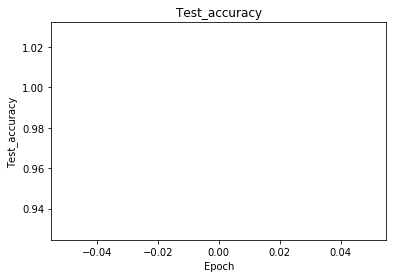

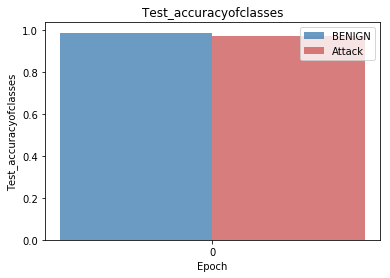

(976972,)
(139568,)
index: 0  loss_value: 1.8964123  accuracy_value: 0.453125
index: 1000  loss_value: 1.3345695  accuracy_value: 0.890625
index: 2000  loss_value: 1.2140884  accuracy_value: 0.9375
index: 3000  loss_value: 1.174498  accuracy_value: 0.96875
index: 4000  loss_value: 1.164516  accuracy_value: 0.90625
index: 5000  loss_value: 1.1455427  accuracy_value: 0.984375
index: 6000  loss_value: 1.0912268  accuracy_value: 0.984375
index: 7000  loss_value: 1.1000447  accuracy_value: 0.96875
index: 8000  loss_value: 1.1660321  accuracy_value: 0.921875
index: 9000  loss_value: 1.048052  accuracy_value: 1.0
index: 10000  loss_value: 1.1304272  accuracy_value: 0.953125
index: 11000  loss_value: 1.0847555  accuracy_value: 0.96875
index: 12000  loss_value: 1.1716919  accuracy_value: 0.96875
index: 13000  loss_value: 1.1020643  accuracy_value: 0.984375
index: 14000  loss_value: 1.040223  accuracy_value: 1.0
index: 15000  loss_value: 1.0549648  accuracy_value: 0.984375
Accuracy of two classe

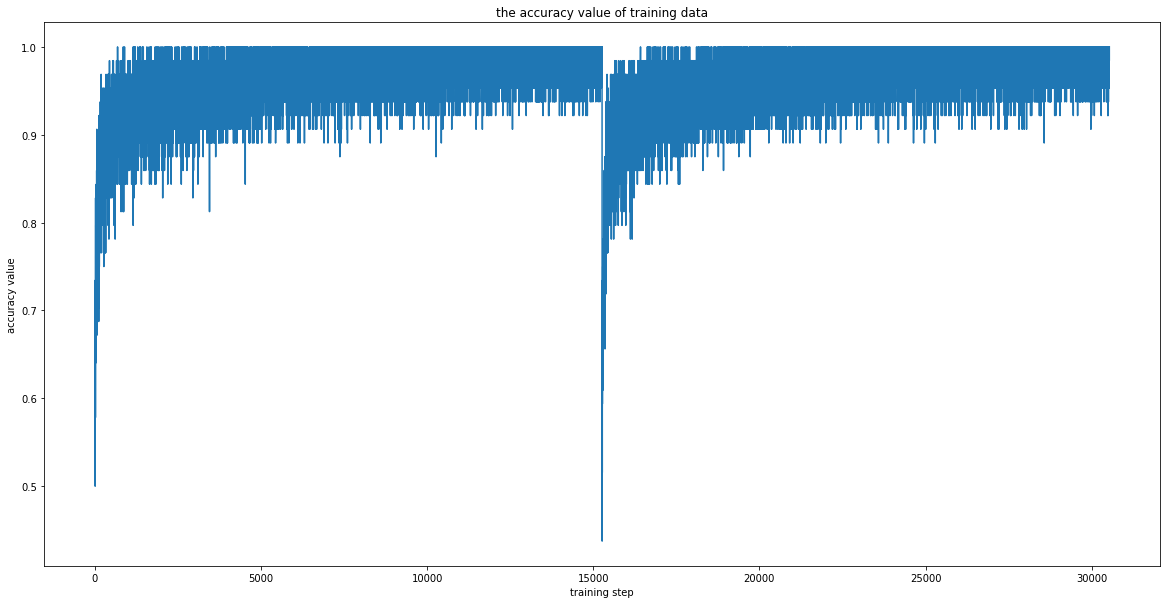

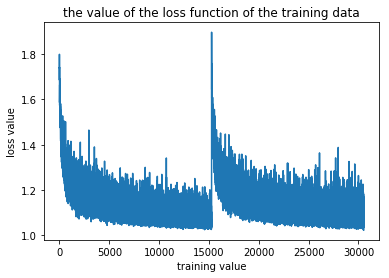

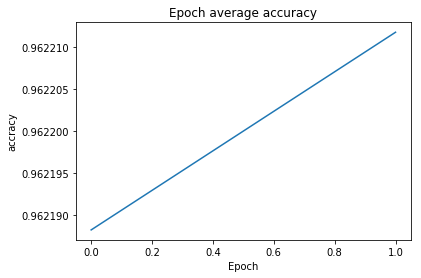

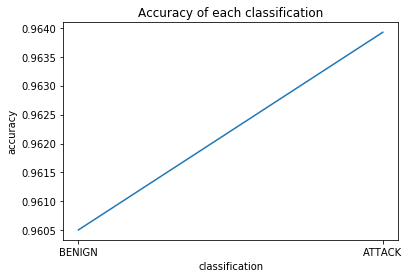

INFO:tensorflow:Restoring parameters from model_folder/saver\model.ckpt
acc: [0.9838571428571429, 0.9106485740570377]
true_count 132222
139584
测试precision= 0.9472575653370013


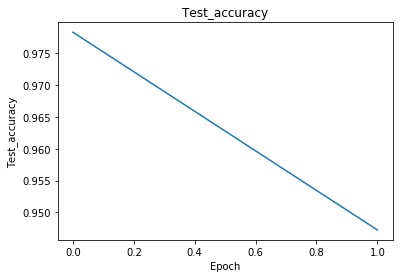

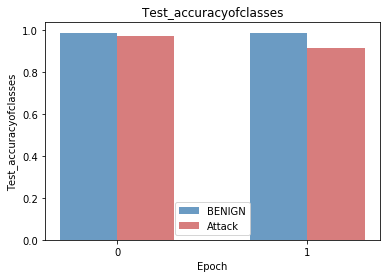

(976972,)
(139568,)
index: 0  loss_value: 1.7185827  accuracy_value: 0.5
index: 1000  loss_value: 1.2516059  accuracy_value: 0.890625
index: 2000  loss_value: 1.1663661  accuracy_value: 0.953125
index: 3000  loss_value: 1.2574482  accuracy_value: 0.890625
index: 4000  loss_value: 1.131139  accuracy_value: 0.953125
index: 5000  loss_value: 1.1301124  accuracy_value: 0.984375
index: 6000  loss_value: 1.1956012  accuracy_value: 0.9375
index: 7000  loss_value: 1.1160883  accuracy_value: 0.984375
index: 8000  loss_value: 1.1288785  accuracy_value: 0.9375
index: 9000  loss_value: 1.0802292  accuracy_value: 0.984375
index: 10000  loss_value: 1.1187811  accuracy_value: 0.953125
index: 11000  loss_value: 1.1127139  accuracy_value: 0.953125
index: 12000  loss_value: 1.0640471  accuracy_value: 0.984375
index: 13000  loss_value: 1.0863605  accuracy_value: 0.96875
index: 14000  loss_value: 1.1097121  accuracy_value: 0.96875
index: 15000  loss_value: 1.0811139  accuracy_value: 0.96875
Accuracy of tw

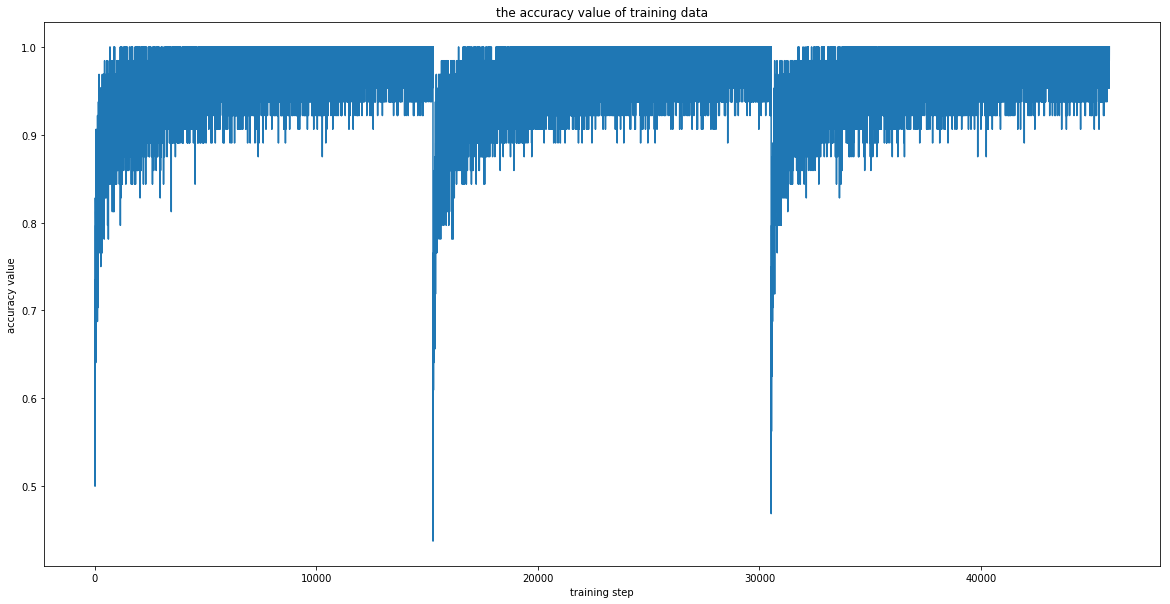

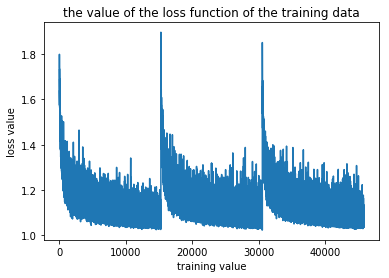

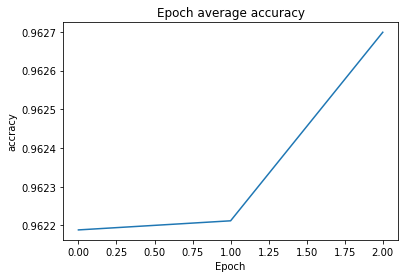

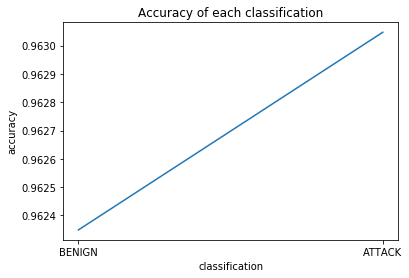

INFO:tensorflow:Restoring parameters from model_folder/saver\model.ckpt
acc: [0.9786142857142857, 0.999209406623735]
true_count 138016
139584
测试precision= 0.9887666208161394


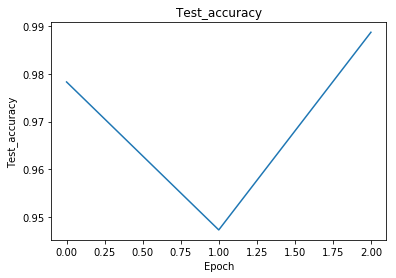

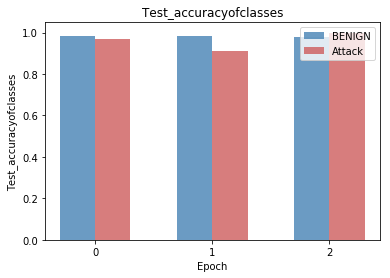

(976972,)
(139568,)
index: 0  loss_value: 1.7806152  accuracy_value: 0.578125
index: 1000  loss_value: 1.2624059  accuracy_value: 0.890625
index: 2000  loss_value: 1.2557212  accuracy_value: 0.921875
index: 3000  loss_value: 1.1922464  accuracy_value: 0.9375
index: 4000  loss_value: 1.2244079  accuracy_value: 0.90625
index: 5000  loss_value: 1.1913755  accuracy_value: 0.9375
index: 6000  loss_value: 1.0925235  accuracy_value: 0.984375
index: 7000  loss_value: 1.1416512  accuracy_value: 0.9375
index: 8000  loss_value: 1.1063819  accuracy_value: 0.953125
index: 9000  loss_value: 1.071202  accuracy_value: 0.984375
index: 10000  loss_value: 1.069764  accuracy_value: 0.984375
index: 11000  loss_value: 1.0910902  accuracy_value: 0.96875
index: 12000  loss_value: 1.0933726  accuracy_value: 0.953125
index: 13000  loss_value: 1.07861  accuracy_value: 0.984375
index: 14000  loss_value: 1.0523729  accuracy_value: 1.0
index: 15000  loss_value: 1.1146729  accuracy_value: 0.953125
Accuracy of two cl

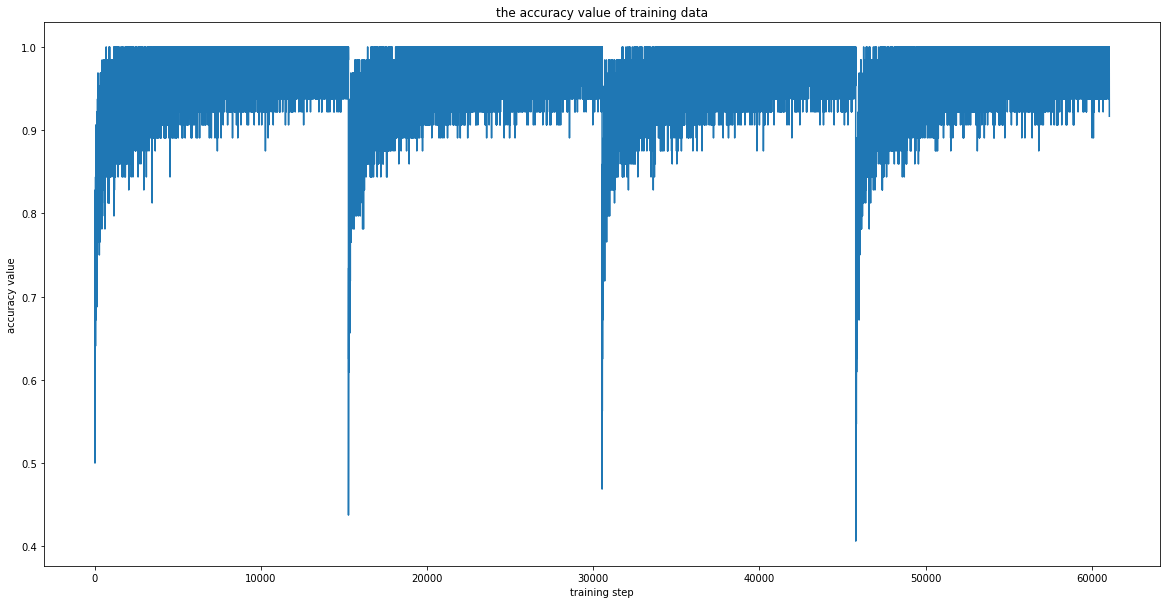

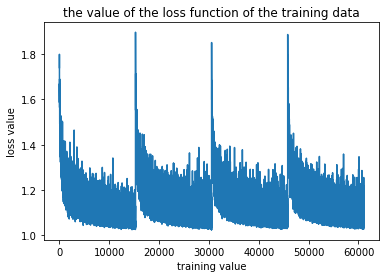

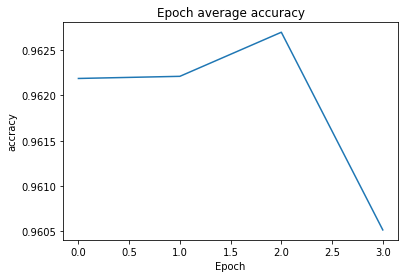

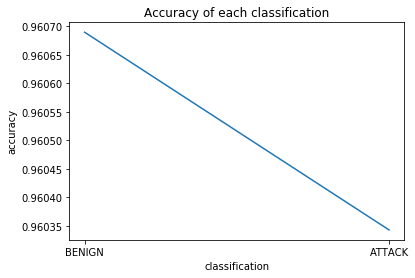

INFO:tensorflow:Restoring parameters from model_folder/saver\model.ckpt
acc: [0.9814, 0.999913753449862]
true_count 138260
139584
测试precision= 0.9905146721687299


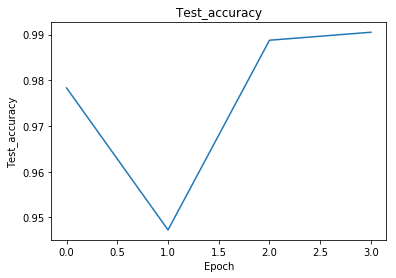

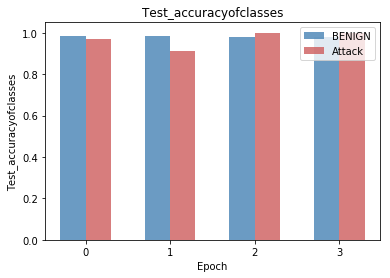

(976972,)
(139568,)
index: 0  loss_value: 1.7574784  accuracy_value: 0.5
index: 1000  loss_value: 1.2804254  accuracy_value: 0.921875
index: 2000  loss_value: 1.2302756  accuracy_value: 0.9375
index: 3000  loss_value: 1.2200533  accuracy_value: 0.9375
index: 4000  loss_value: 1.1026177  accuracy_value: 0.984375
index: 5000  loss_value: 1.0999899  accuracy_value: 0.984375
index: 6000  loss_value: 1.0803511  accuracy_value: 0.984375
index: 7000  loss_value: 1.1146038  accuracy_value: 0.953125
index: 8000  loss_value: 1.1093392  accuracy_value: 0.953125
index: 9000  loss_value: 1.1893287  accuracy_value: 0.90625
index: 10000  loss_value: 1.1557711  accuracy_value: 0.9375
index: 11000  loss_value: 1.0696858  accuracy_value: 0.984375
index: 12000  loss_value: 1.137798  accuracy_value: 0.9375
index: 13000  loss_value: 1.0799494  accuracy_value: 0.953125
index: 14000  loss_value: 1.0637739  accuracy_value: 0.984375
index: 15000  loss_value: 1.1041857  accuracy_value: 0.953125
Accuracy of two 

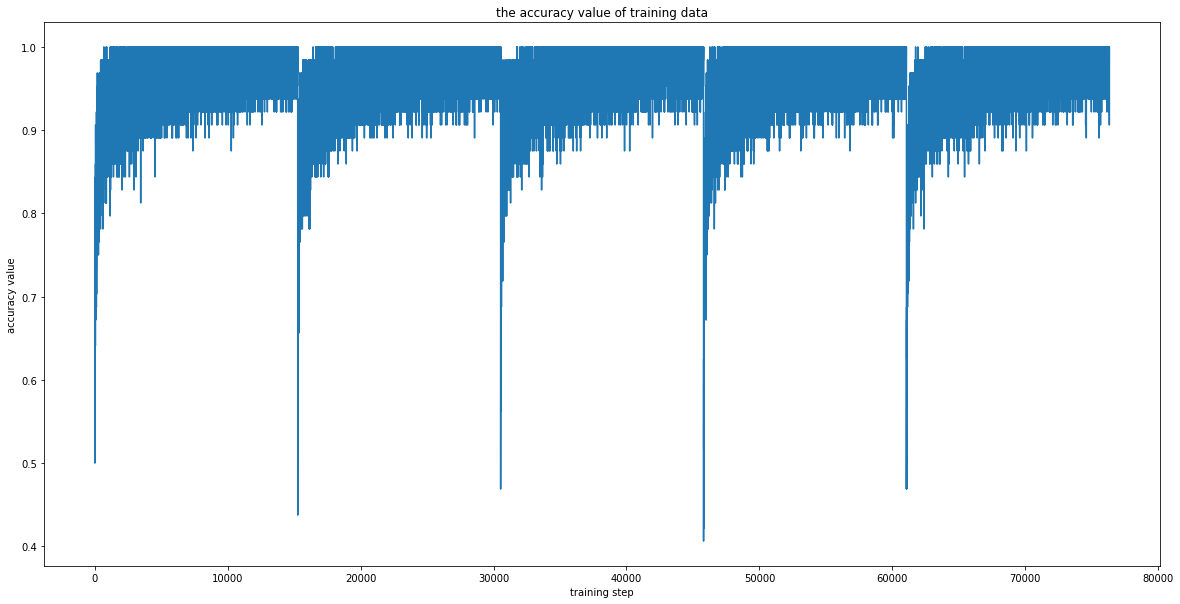

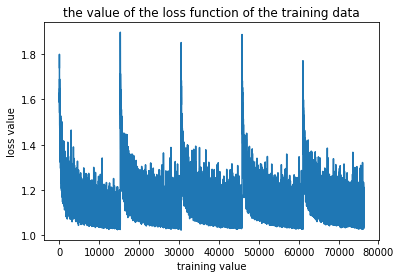

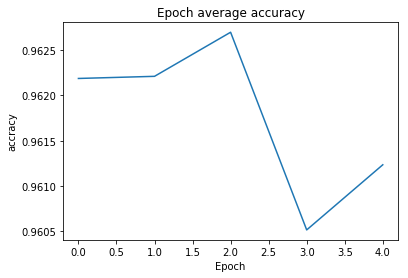

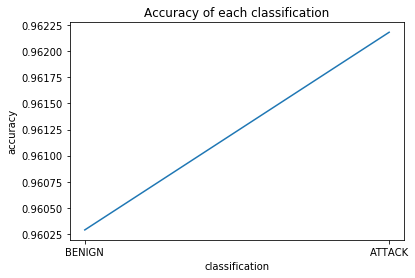

INFO:tensorflow:Restoring parameters from model_folder/saver\model.ckpt
acc: [0.9823285714285714, 0.999611890524379]
true_count 138304
139584
测试precision= 0.9908298945437872


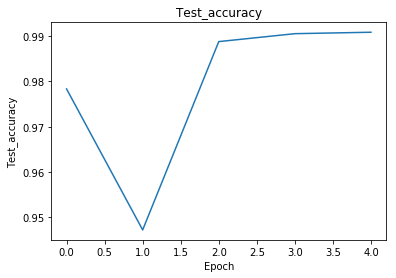

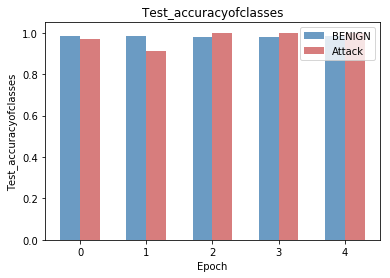

(976973,)
(139567,)
index: 0  loss_value: 1.8704033  accuracy_value: 0.5625
index: 1000  loss_value: 1.139625  accuracy_value: 0.984375
index: 2000  loss_value: 1.142803  accuracy_value: 0.96875
index: 3000  loss_value: 1.0797682  accuracy_value: 1.0
index: 4000  loss_value: 1.1005601  accuracy_value: 0.96875
index: 5000  loss_value: 1.1073734  accuracy_value: 0.984375
index: 6000  loss_value: 1.0879365  accuracy_value: 0.984375
index: 7000  loss_value: 1.0986481  accuracy_value: 0.96875
index: 8000  loss_value: 1.1153526  accuracy_value: 0.96875
index: 9000  loss_value: 1.0461452  accuracy_value: 1.0
index: 10000  loss_value: 1.0647793  accuracy_value: 0.984375
index: 11000  loss_value: 1.0768881  accuracy_value: 0.984375
index: 12000  loss_value: 1.034984  accuracy_value: 1.0
index: 13000  loss_value: 1.0493695  accuracy_value: 0.984375
index: 14000  loss_value: 1.0728707  accuracy_value: 0.984375
index: 15000  loss_value: 1.0343122  accuracy_value: 1.0
Accuracy of two classes： [0.97

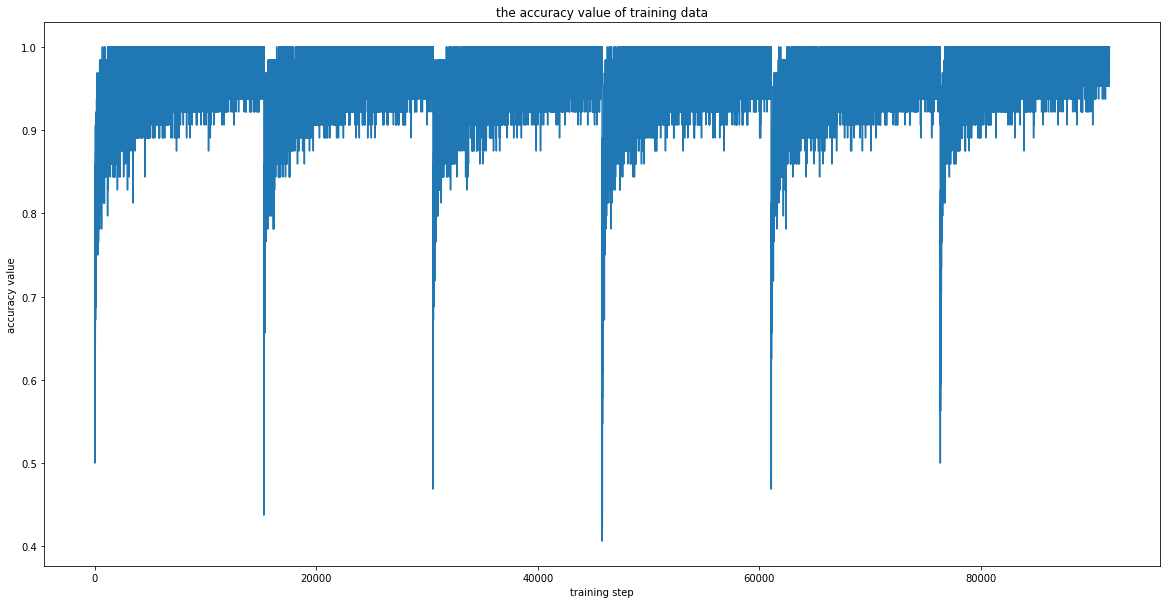

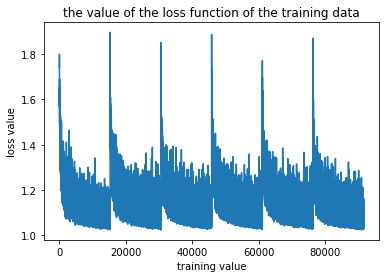

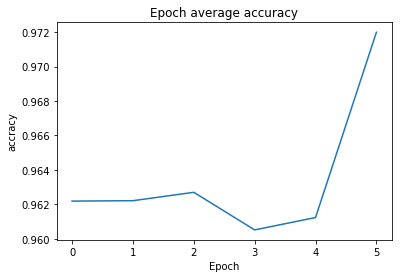

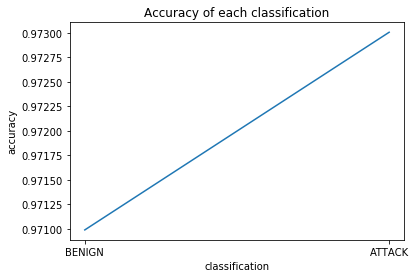

INFO:tensorflow:Restoring parameters from model_folder/saver\model.ckpt
acc: [0.9882714285714286, 0.6250664826713815]
true_count 112663
139584
测试precision= 0.807134055479138


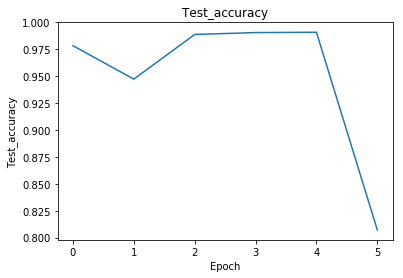

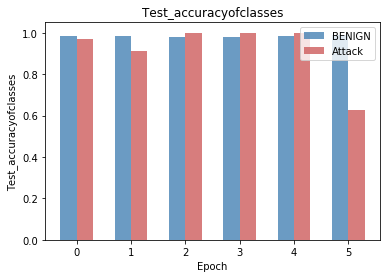

(976973,)
(139567,)
index: 0  loss_value: 1.7086549  accuracy_value: 0.609375
index: 1000  loss_value: 1.2419016  accuracy_value: 0.9375
index: 2000  loss_value: 1.1543883  accuracy_value: 0.953125
index: 3000  loss_value: 1.1545948  accuracy_value: 0.953125
index: 4000  loss_value: 1.1077315  accuracy_value: 0.953125
index: 5000  loss_value: 1.1260805  accuracy_value: 0.9375
index: 6000  loss_value: 1.1152332  accuracy_value: 0.953125


KeyboardInterrupt: 

In [5]:
if __name__ == '__main__':
    run_main()